[ 0.09762701  0.43037873  0.20552675  0.08976637 -0.1526904   0.29178823
 -0.12482558  0.783546    0.92732552 -0.23311696  0.58345008  0.05778984
  0.13608912  0.85119328 -0.85792788 -0.8257414  -0.95956321  0.66523969
  0.5563135   0.7400243   0.95723668  0.59831713 -0.07704128  0.56105835
 -0.76345115  0.27984204 -0.71329343  0.88933783  0.04369664 -0.17067612
 -0.47088878  0.54846738 -0.08769934  0.1368679  -0.9624204   0.23527099
  0.22419145  0.23386799  0.88749616  0.3636406  -0.2809842  -0.12593609
  0.39526239 -0.87954906  0.33353343  0.34127574 -0.57923488 -0.7421474
 -0.3691433  -0.27257846  0.14039354 -0.12279697  0.97674768 -0.79591038
 -0.58224649 -0.67738096  0.30621665 -0.49341679 -0.06737845 -0.51114882
 -0.68206083 -0.77924972  0.31265918 -0.7236341  -0.60683528 -0.26254966
  0.64198646 -0.80579745  0.67588981 -0.80780318  0.95291893 -0.0626976
  0.95352218  0.20969104  0.47852716 -0.92162442 -0.43438607 -0.75960688
 -0.4077196  -0.76254456 -0.36403364 -0.17147401 -0.8

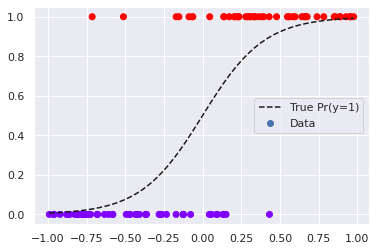

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Create simple logistic data
rng = np.random.RandomState(0)
n_samples = 100
x = 2*(rng.rand(n_samples)-0.5)

theta_true = 5
# Very simplified logistic regression model with only 1 parameter
def model(x, theta):
    return 1 / (1 + np.exp(-x.dot(theta)))
y = (rng.rand(*x.shape) <= model(x, theta_true)).astype(float)
print(y.shape)
# Plot data
xq = np.linspace(np.min(x), np.max(x))
plt.plot(xq, model(xq, theta_true), '--k', label='True Pr(y=1)')
plt.scatter(x, y, c=y, cmap='rainbow', label='Data')
plt.legend()

# Define the logistic regression objective 

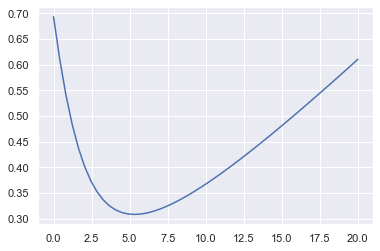

In [ ]:
def objective(x, y, theta):
    prob = model(x, theta)
    return -np.mean(y * np.log(prob) + (1-y) * np.log(1 - prob))

theta_arr = np.linspace(0, 20)
obj_arr = [objective(x, y, theta) for theta in theta_arr]
plt.plot(theta_arr, obj_arr)

### NOTE: Because of randomness, empirical estimate will not exactly match true model. (e.g., this has a minimum closer to 5.3 or so

# Explicitly compute (by hand) the gradient of the function

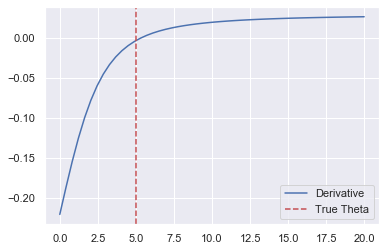

In [ ]:
def grad_objective(x, y, theta):
    #See https://web.stanford.edu/~jurafsky/slp3/5.pdf section 5.8 for derivation
    return np.mean((model(x, theta) - y) * x)

grad_arr = [grad_objective(x, y, theta) for theta in theta_arr]
plt.plot(theta_arr, grad_arr, label='Derivative')
plt.axvline(5, linestyle='--', color='r', label='True Theta')
plt.legend()

# (Stochastic) Gradient Descent with various step sizes

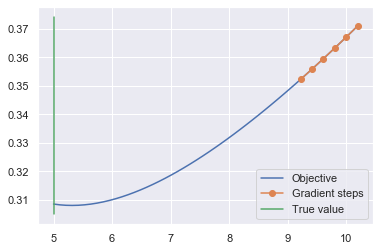

In [ ]:
# Gradient descent parameters
max_iter = 5
step_size = 10 # 10, 100, 300
sgd = False
if sgd: max_iter *= 5 # Increase number of iterations for SGD
rng = np.random.RandomState(0)

# Initialization
theta_hat = 10.2 # An arbitrary starting value
theta_hat_arr = [theta_hat]
obj_hat_arr = [objective(x, y, theta_hat)]

# Gradient descent iterations
for it in range(max_iter):
    if sgd:
        # Select random data point
        rand_idx = rng.randint(len(y))
        xg, yg = x[rand_idx:rand_idx+1], y[rand_idx:rand_idx+1]
    else:
        # Use all data points in gradient calculation
        xg, yg = x, y
    grad = grad_objective(xg, yg, theta_hat)
    theta_hat = theta_hat - step_size * grad
    
    # Save estimates for visualization
    theta_hat_arr.append(theta_hat)
    obj_hat_arr.append(objective(x, y, theta_hat))

vis_arr = np.linspace(np.minimum(np.min(theta_hat_arr), theta_true), np.maximum(np.max(theta_hat_arr), theta_true))
plt.plot(vis_arr, [objective(x, y, theta) for theta in vis_arr], label='Objective') 
plt.plot(theta_hat_arr, obj_hat_arr, 'o-', label='Gradient steps')
plt.plot(np.ones(2)*theta_true, plt.ylim(), label='True value')
plt.legend()